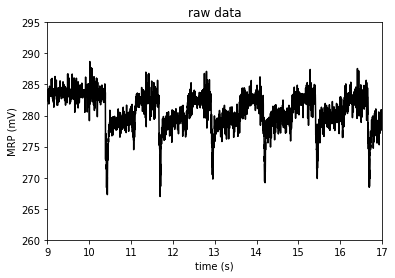

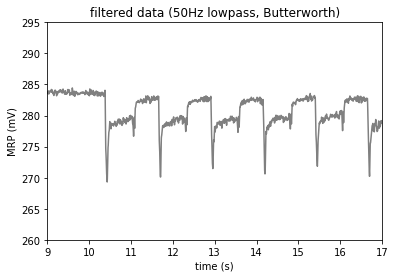

In [9]:
####################################################################################################
# Python code for ephys analysis
#
# - Import raw .abf files
# - Apply filter
# - Plot the results
# 
#####################################################################################################


import neo #IO stuff from here: https://neo.readthedocs.io/en/0.7.0/io.html
import elephant #filters here: https://elephant.readthedocs.io/en/latest/reference/signal_processing.html
from quantities import Hz, s, ms
import numpy as np
import matplotlib.pyplot as plt
from neo.io import AxonIO

# Load .abf file
axon_file = '/Users/joshtitlow/Google Drive File Stream/My Drive/Davis_Lab/Collaborators/Fede_Mangioni/Fede_ephys/12104006.abf'

# Parse .abf file
neo_obj = neo.io.AxonIO(axon_file)
reader = AxonIO(filename='/Users/joshtitlow/Google Drive File Stream/My Drive/Davis_Lab/Collaborators/Fede_Mangioni/Fede_ephys/20190522_p1_trace1.abf')
seg = reader.read_segment()
trace = seg.analogsignals[0]

# Filter the analog signal
filtered_trace = elephant.signal_processing.butter(trace, highpass_freq=None, lowpass_freq=50, order=4, filter_function='filtfilt', fs=1.0, axis=-1)

# Setup time coordinates for plotting
block = seg.analogsignals
sample_freq = str(block[0]._sampling_rate).split(' ')[0]

length = len(trace)/float(sample_freq)
ts = np.arange(0, length, .001)


# plot the raw data and filtered data
plt.figure(1)
plt.subplot() 
plt.plot(ts, trace, color="black")
plt.title('raw data')
plt.ylabel('MRP (mV)')
plt.ylim((260,295))
plt.xlabel('time (s)')
plt.xlim((9,17))
plt.show()

plt.subplot()
plt.plot(ts, filtered_trace, color="gray")
plt.title('filtered data (50Hz lowpass, Butterworth)')
plt.ylabel('MRP (mV)')
plt.ylim((260,295))
plt.xlabel('time (s)')
plt.xlim((9,17))
plt.show()
